In [1]:
%load_ext autoreload
%autoreload 2
import sys
import os
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"/src")
    
import helpers as hlp

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [3]:
# Set plot sizes
SMALL_SIZE = 22
MEDIUM_SIZE = 24
BIGGER_SIZE = 26
BIGGEST_SIZE = 28

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGEST_SIZE)  # fontsize of the figure title

# Load & Merge CSV Data

In [4]:
aws_data_dir = '../data/web_scraped/aws_final/'

# Use helper function to load and merge CSVs from folders in above dir
df_all_hotels = hlp.merge_csv_mult_dir(aws_data_dir)

Folders: ['Tokyo-Kanto-pg1', 'Honolulu-Hawaii.pg1', 'Honolulu-Hawaii.pg4', 'Honolulu-Hawaii.pg3', 'Honolulu-Hawaii.pg2', 'New_York_City-New_York-pg1']


In [5]:
df_all_hotels.shape

(212155, 10)

In [6]:
df_all_hotels.head()

,review_id,url,hotel_name,review_date,review_body,user_location,helpful_vote,rating,csv,folder
0,749389994,https://www.tripadvisor.com/Hotel_Review-g1412...,Aman Tokyo,"March 5, 2020",Consistent service with my past Aman hotel exp...,"Sunnyvale, California",4,5.0,Aman_Tokyo-Otemachi_Chiyoda_Tokyo_Tokyo_Prefec...,Tokyo-Kanto-pg1
1,749264661,https://www.tripadvisor.com/Hotel_Review-g1412...,Aman Tokyo,"March 5, 2020",Stayed for 3 days and everything at Aman is pe...,"Vancouver, Canada",6,5.0,Aman_Tokyo-Otemachi_Chiyoda_Tokyo_Tokyo_Prefec...,Tokyo-Kanto-pg1
2,746956250,https://www.tripadvisor.com/Hotel_Review-g1412...,Aman Tokyo,"February 23, 2020",Although I live in Tokyo but I decided to take...,"Tokyo, Japan",53,4.0,Aman_Tokyo-Otemachi_Chiyoda_Tokyo_Tokyo_Prefec...,Tokyo-Kanto-pg1
3,745398599,https://www.tripadvisor.com/Hotel_Review-g1412...,Aman Tokyo,"February 16, 2020",An outstanding stay in a beautiful Aman in dow...,"Singapore, Singapore",5,5.0,Aman_Tokyo-Otemachi_Chiyoda_Tokyo_Tokyo_Prefec...,Tokyo-Kanto-pg1
4,743365715,https://www.tripadvisor.com/Hotel_Review-g1412...,Aman Tokyo,"February 6, 2020",Stayed here for 2 nights (second time after 3 ...,"Singapore, Singapore",38,5.0,Aman_Tokyo-Otemachi_Chiyoda_Tokyo_Tokyo_Prefec...,Tokyo-Kanto-pg1


In [7]:
df_all_hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212155 entries, 0 to 212154
Data columns (total 10 columns):
review_id        212155 non-null int64
url              212155 non-null object
hotel_name       212155 non-null object
review_date      212155 non-null object
review_body      212155 non-null object
user_location    184157 non-null object
helpful_vote     212155 non-null int64
rating           212155 non-null float64
csv              212155 non-null object
folder           212155 non-null object
dtypes: float64(1), int64(2), object(7)
memory usage: 16.2+ MB


In [8]:
# Get count, pct, and type of missing data (per column)
hlp.get_nulls(df_all_hotels)

,Total,Percent,Type
user_location,27998,0.13197,object
folder,0,0.00000,object
csv,0,0.00000,object
rating,0,0.00000,float64
helpful_vote,0,0.00000,int64
review_body,0,0.00000,object
review_date,0,0.00000,object
hotel_name,0,0.00000,object
url,0,0.00000,object
review_id,0,0.00000,int64


# Clean & Prep Data

In [9]:
df_all_hotels_cleaned = df_all_hotels.copy()

# Use helper function to do clean & prep
df_all_hotels_cleaned = hlp.clean_and_prep(df_all_hotels_cleaned)

df_all_hotels_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212155 entries, 0 to 212154
Data columns (total 14 columns):
review_id        212155 non-null int64
url              212155 non-null object
hotel_name       212155 non-null object
review_date      212155 non-null object
review_body      212155 non-null object
user_location    212155 non-null object
helpful_vote     212155 non-null int64
rating           212155 non-null float64
csv              212155 non-null object
folder           212155 non-null object
City             212155 non-null object
polarity         212155 non-null float64
sentiment_int    212155 non-null int64
sentiment        212155 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 22.7+ MB


# EDA

In [10]:
df_all_hotels_cleaned.sample(15)

,review_id,url,hotel_name,review_date,review_body,user_location,helpful_vote,rating,csv,folder,City,polarity,sentiment_int,sentiment
107433,224697248,https://www.tripadvisor.com/Hotel_Review-g6098...,Hyatt Regency Waikiki Beach Resort & Spa,"August 26, 2014",I had requested an upgrade a few days prior to...,"Phoenix, Arizona",0,3.0,Hyatt_Regency_Waikiki_Beach_Resort_Spa-Honolul...,Honolulu-Hawaii.pg3,Honolulu,0.5,1,neutral
144648,47492067,https://www.tripadvisor.com/Hotel_Review-g6098...,Pearl Hotel Waikiki,"October 22, 2009",Aqua Pearl is located in a central location in...,"Richmond Hill, Canada",53,3.0,Pearl_Hotel_Waikiki-Honolulu_Oahu_Hawaii__en.csv,Honolulu-Hawaii.pg2,Honolulu,0.5,1,neutral
143305,135563089,https://www.tripadvisor.com/Hotel_Review-g6098...,Hyatt Place Waikiki Beach,"July 27, 2012",Our behalf of my family I am writing this revi...,Honolulu,20,5.0,Hyatt_Place_Waikiki_Beach-Honolulu_Oahu_Hawaii...,Honolulu-Hawaii.pg2,Honolulu,1.0,2,positive
35993,5481407,https://www.tripadvisor.ca/Hotel_Review-g60982...,Hilton Hawaiian Village Waikiki Beach Resort,"July 17, 2006",We've loved Hawaii since my husband and I hone...,New York,8,2.0,Hilton_Hawaiian_Village_Waikiki_Beach_Resort-H...,Honolulu-Hawaii.pg1,Honolulu,0.0,0,negative
26363,385418393,https://www.tripadvisor.ca/Hotel_Review-g60982...,Hilton Hawaiian Village Waikiki Beach Resort,"June 23, 2016",This hotel is good over all. I do think its ma...,"Los Angeles, California",2,4.0,Hilton_Hawaiian_Village_Waikiki_Beach_Resort-H...,Honolulu-Hawaii.pg1,Honolulu,1.0,2,positive
194421,488559414,https://www.tripadvisor.com/Hotel_Review-g6076...,Hampton Inn Manhattan/Times Square South,"May 28, 2017",Great location. Easy to get to everything. Lon...,"Pembroke Pines, Florida",3,5.0,Hampton_Inn_Manhattan_Times_Square_South-New_Y...,New_York_City-New_York-pg1,New_York_City,1.0,2,positive
133833,133844150,https://www.tripadvisor.com/Hotel_Review-g6098...,Sheraton Waikiki,"July 9, 2012",We only had the opportunity to stay here for o...,n/a,0,5.0,Sheraton_Waikiki-Honolulu_Oahu_Hawaii__en.csv,Honolulu-Hawaii.pg2,Honolulu,1.0,2,positive
184747,368822506,https://www.tripadvisor.com/Hotel_Review-g6076...,Hudson New York,"April 29, 2016","When I entered my room, I immediately went to ...",Methuen,0,2.0,Hudson_New_York-New_York_City_New_York__en.csv,New_York_City-New_York-pg1,New_York_City,0.0,0,negative
86682,258481208,https://www.tripadvisor.com/Hotel_Review-g6098...,"Moana Surfrider, A Westin Resort & Spa, Waikik...","March 8, 2015",My Hubby and I just stayed at this property th...,"Great Falls, Montana",30,3.0,Moana_Surfrider_A_Westin_Resort_Spa_Waikiki_Be...,Honolulu-Hawaii.pg3,Honolulu,0.5,1,neutral
42173,129341946,https://www.tripadvisor.com/Hotel_Review-g6098...,Aston Waikiki Beach Hotel,"May 4, 2012",I loved staying here. As it was our first trip...,n/a,14,5.0,Aston_Waikiki_Beach_Hotel-Honolulu_Oahu_Hawaii...,Honolulu-Hawaii.pg1,Honolulu,1.0,2,positive


In [11]:
# Print how many unique values each column has
hlp.print_unique_ct(df_all_hotels_cleaned)

Count of Unique Values per Column:

review_id: 212155
url: 42484
hotel_name: 149
review_date: 6248
review_body: 212124
user_location: 27830
helpful_vote: 799
rating: 5
csv: 149
folder: 6
City: 3
polarity: 3
sentiment_int: 3
sentiment: 3


In [12]:
df_all_hotels_cleaned.describe()

,review_id,helpful_vote,rating,polarity,sentiment_int
count,2.121550e+05,212155.000000,212155.000000,212155.000000,212155.000000
mean,3.485569e+08,30.036360,4.104650,0.837633,1.675266
std,2.108024e+08,192.647358,1.094571,0.321905,0.643809
min,2.824200e+05,0.000000,1.000000,0.000000,0.000000
25%,1.655966e+08,2.000000,4.000000,1.000000,2.000000
50%,3.260000e+08,9.000000,4.000000,1.000000,2.000000
75%,5.286325e+08,29.000000,5.000000,1.000000,2.000000
max,7.534573e+08,34443.000000,5.000000,1.000000,2.000000


Total Number of Reviews: 212155


Text(0.5, 1.0, 'Count of Hotel Reviews per City')

Text(0.5, 0, 'City')

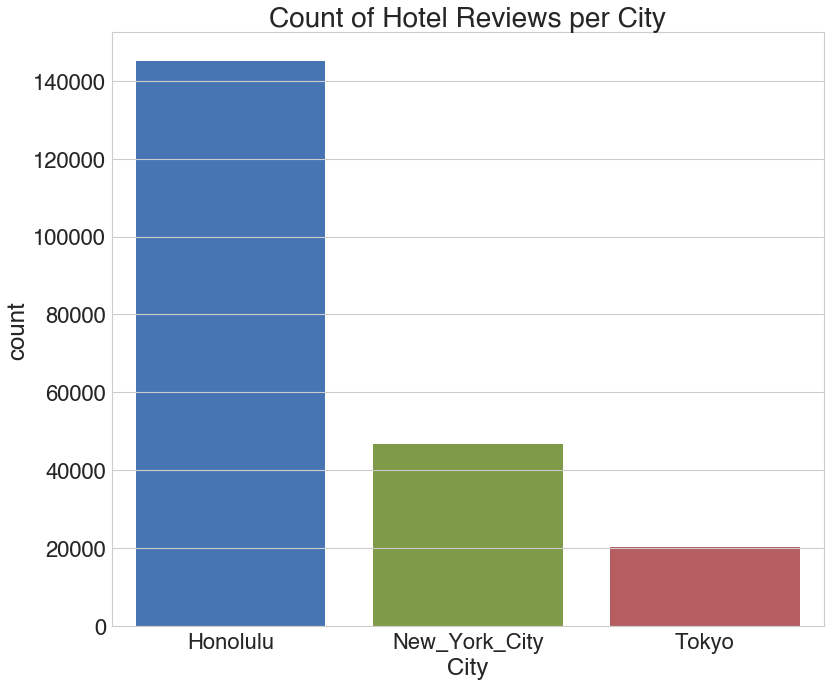

In [13]:
# Plot counts - Reviews per city
df = df_all_hotels_cleaned
print('Total Number of Reviews:', df.shape[0])

fig, ax = plt.subplots(figsize=(12,10))
plot = sns.countplot(data=df, x='City', ax=ax, order = df['City'].value_counts().index)
ax.set_title('Count of Hotel Reviews per City', size=BIGGEST_SIZE)
ax.set_xlabel('City')
fig.tight_layout()
fig.savefig('../images/countplot_reviews_byCity_full')

Total Number of Ratings:  212155


Text(0.5, 1.0, 'Counts of Hotel Ratings')

Text(0.5, 0, 'Hotel Rating')

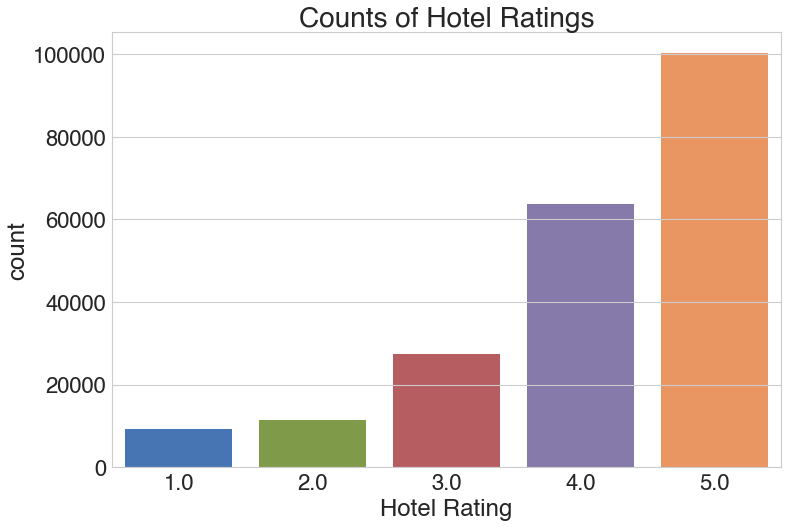

In [14]:
# Plot counts - Ratings
df = df_all_hotels_cleaned
print('Total Number of Ratings: ', df.shape[0])

fig, ax = plt.subplots(figsize=(12,8))
plot = sns.countplot(data=df, x='rating', ax=ax)
ax.set_title('Counts of Hotel Ratings', size=BIGGEST_SIZE)
ax.set_xlabel('Hotel Rating')
fig.savefig('../images/countplot_ratings_full')

Total Number of Ratings:  212155


(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a29364dd0>)

Text(0.5, 1, 'Balance of Review Sentiments')

Text(73.76, 0.5, '')

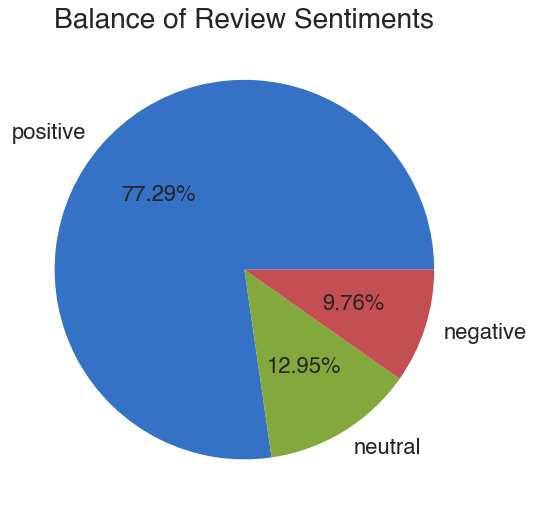

In [15]:
# Plot pie - Sentiments
df = df_all_hotels_cleaned
print('Total Number of Ratings: ', df.shape[0])

fig, ax = plt.subplots(figsize=(8,8))
hlp.plot_pie(df['sentiment'], fig, ax)
ax.set_title('Balance of Review Sentiments', size=BIGGEST_SIZE)
ax.set_ylabel('')
fig.savefig('../images/pie_sentiments_full')

# NLP

# Train-Test Split

In [16]:
# Specify df & target, X & y
df = df_all_hotels_cleaned.copy()
cols = df.columns
target = 'sentiment'

X = df.drop(columns=[target]).to_numpy()
y = df[target].to_numpy()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((169724, 13), (42431, 13), (169724,), (42431,))

In [18]:
train = np.concatenate([X_train, y_train.reshape(-1,1)], axis = 1)
train_df = pd.DataFrame(train, columns=cols)
train_df.head()

,review_id,url,hotel_name,review_date,review_body,user_location,helpful_vote,rating,csv,folder,City,polarity,sentiment_int,sentiment
0,703398208,https://www.tripadvisor.com/Hotel_Review-g1412...,ANA InterContinental Tokyo,"August 26, 2019",Avoid the lobby bar. We stopped there whilst w...,"Sydney, Australia",37,1,ANA_InterContinental_Tokyo-Akasaka_Minato_Toky...,Tokyo-Kanto-pg1,Tokyo,0,0,negative
1,165112988,https://www.tripadvisor.com/Hotel_Review-g6098...,Royal Grove Waikiki,"June 24, 2013",This was the second time we have stayed at the...,Christchurch,13,5,Royal_Grove_Waikiki-Honolulu_Oahu_Hawaii__en.csv,Honolulu-Hawaii.pg2,Honolulu,1,2,positive
2,159308833,https://www.tripadvisor.com/Hotel_Review-g1412...,ANA InterContinental Tokyo,"April 30, 2013","This hotel is convenient, if you have business...","Beverly Hills, California",12,3,ANA_InterContinental_Tokyo-Akasaka_Minato_Toky...,Tokyo-Kanto-pg1,Tokyo,0.5,1,neutral
3,224448922,https://www.tripadvisor.com/Hotel_Review-g6098...,White Sands Hotel,"August 25, 2014",It took close inspection to conclude that the ...,"Key Biscayne, Florida",87,3,White_Sands_Hotel-Honolulu_Oahu_Hawaii__en.csv,Honolulu-Hawaii.pg2,Honolulu,0.5,1,neutral
4,544748432,https://www.tripadvisor.com/Hotel_Review-g6098...,Aqua Ohia Waikiki Studio Suites,"December 3, 2017",This hotel is good value for the price. The ho...,"Sydney, Australia",3,4,Aqua_Ohia_Waikiki_Studio_Suites-Honolulu_Oahu_...,Honolulu-Hawaii.pg3,Honolulu,1,2,positive


# Appendix

In [20]:
# don't go beyond here with Run All
assert False

AssertionError: 

Total Number of Ratings:  169724


(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a2933ded0>)

Text(0.5, 1, 'Balance of Review Sentiments')

Text(73.76, 0.5, '')

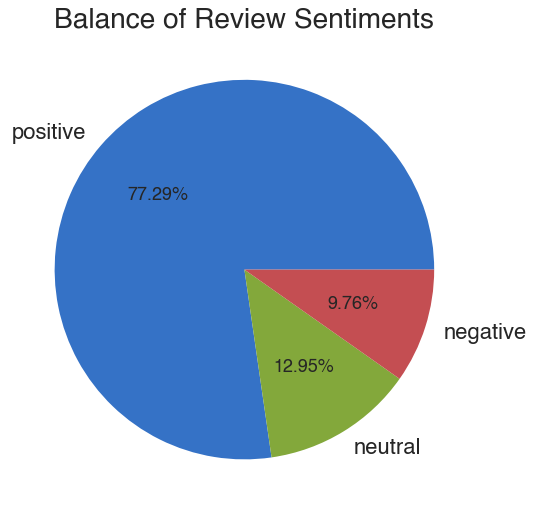

In [19]:
# Plot pie - Sentiments
df = train_df
print('Total Number of Ratings: ', df.shape[0])

fig, ax = plt.subplots(figsize=(8,8))
hlp.plot_pie(df['sentiment'], fig, ax)
ax.set_title('Balance of Review Sentiments', size=BIGGEST_SIZE)
ax.set_ylabel('')
# fig.savefig('../images/pie_sentiments_train')